# This notebook demonstrates how to download the netcdf POES data files (in netcdf format) for a given date range (there are multiple files per day), process them to get auroral boundary (equatorward) and plot it!


In [1]:
import os
import datetime
from poes import dwnld_poes, get_aur_bnd, poes_plot_utils
from davitpy import utils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# dates to download raw poes files
sTimePOES = datetime.datetime( 2015,4,9 )
eTimePOES = datetime.datetime( 2015,4,9 )

In [3]:
# dir to store raw poes files
dayCount = (eTimePOES - sTimePOES).days + 1
# Loop through the days and download files
for inpDate in (sTimePOES + \
            datetime.timedelta(n) for n in range(dayCount)):
    poesDwnldObj = dwnld_poes.PoesDwnld(inpDate)
    # NOTE : set a proper outdir otherwise the data
    # is saved in the working directory by default
    poesFiles = poesDwnldObj.get_all_sat_data(outDir="/tmp/poes/raw")

downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/noaa18/poes_n18_20150409_proc.nc
moving file to destination folder poes_n18_20150409_proc.nc
outDir--> /tmp/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/metop01/poes_m01_20150409_proc.nc
moving file to destination folder poes_m01_20150409_proc.nc
outDir--> /tmp/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/noaa19/poes_n19_20150409_proc.nc
moving file to destination folder poes_n19_20150409_proc.nc
outDir--> /tmp/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/2015/metop02/poes_m02_20150409_proc.nc
moving file to destination folder poes_m02_20150409_proc.nc
outDir--> /tmp/poes/raw
downloading file from url-->http://satdat.ngdc.noaa.gov/sem/poes/data/processed/ngdc/uncorrected/full/

In [4]:
# Read data from the POES files
# and get the auroral boundary location
# by fitting a circle
poesRdObj = get_aur_bnd.PoesAur()
( poesAllEleDataDF, poesAllProDataDF ) = poesRdObj.read_poes_data_files(\
                                            poesRawDate=sTimePOES,\
                                            poesRawDir="/tmp/poes/raw/" )
# Or you can uncomment the line below and read the data!
# ( poesAllEleDataDF, poesAllProDataDF ) = poesRdObj.read_poes_data_files(poesFiles)
# Get for a given time get the closest satellite passes
# We can do this at multiple instances for a given time range/step
timeRange = [ poesAllEleDataDF["date"].min(),\
                 poesAllEleDataDF["date"].max() ]
# aurPassDF contains closest passes for a given time 
# for all the satellites in both the hemispheres!
aurPassDF = poesRdObj.get_closest_sat_passes( poesAllEleDataDF,\
                                    poesAllProDataDF, timeRange )
# determine auroral boundaries from all the POES satellites
# at a given time. The procedure is described in the code! 
# go over it!!!
eqBndLocsDF = poesRdObj.get_nth_ele_eq_bnd_locs( aurPassDF,\
                                                poesAllEleDataDF )
# to get an estimate of the auroral boundary! fit a circle
# to the boundaries determined from each satellite!
# The fits are written to a file and can be stored in 
# a given location
# NOTE : set a proper outdir otherwise the data
# is saved in the working directory by default
bndDF=poesRdObj.fit_circle_aurbnd(eqBndLocsDF, outDir="/tmp/poes/bnd/")
print "ESTIMATED BOUNDARY"
print bndDF.head()
print "ESTIMATED BOUNDARY"

fileList not set! Working with poesRawDate & poesRawDir
saving to file---> /tmp/poes/bnd/poes-fit-20150409.txt
ESTIMATED BOUNDARY
   MLAT  MLON      date  time
0  65.2   0.0  20150409  0200
1  65.2  15.0  20150409  0200
2  65.3  30.0  20150409  0200
3  65.6  45.0  20150409  0200
4  65.9  60.0  20150409  0200
ESTIMATED BOUNDARY


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


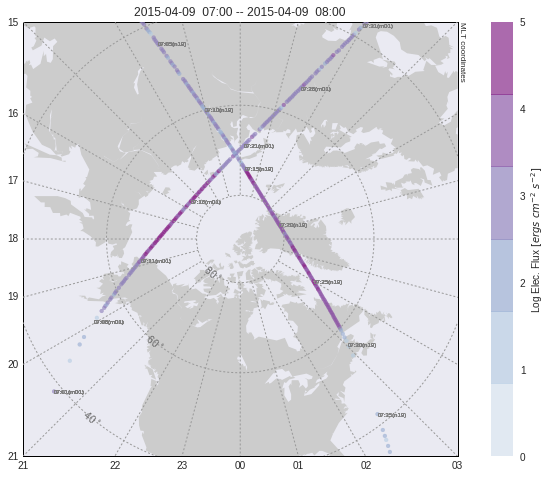

In [5]:
# Plot selected satellite passes between a time range
pltDate = datetime.datetime(2015,4,9)
timeRange = [ datetime.datetime(2015,4,9,7),\
             datetime.datetime(2015,4,9,8) ]
coords = "mlt"

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords,\
                           lat_0=90., lon_0=0, datetime=timeRange[0])
poesPltObj = poes_plot_utils.PlotUtils(pltDate, pltCoords=coords)
poesPltObj.overlay_sat_pass(timeRange,m,ax,"/tmp/poes/raw/",\
                            satList=["m01", "n19"])
fig.savefig("figs/poes-demo1.pdf",bbox_inches='tight')

reading boundary data from--> /tmp/poes/bnd/poes-fit-20150409.txt


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


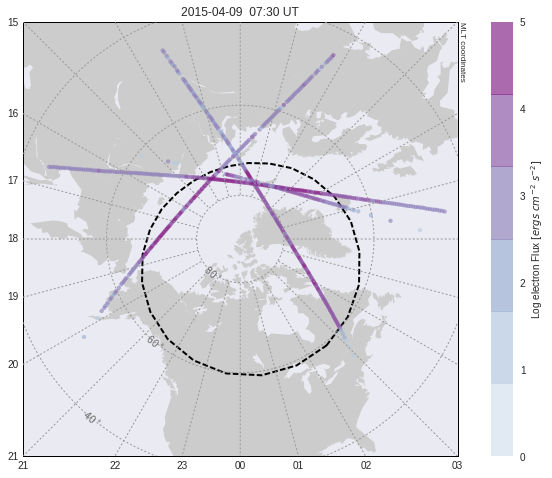

In [6]:
# Plot all closest (in time) satellite passes at a given time
# and also overlay the estimated auroral boundary
pltDate = datetime.datetime(2015,4,9)
selTime = datetime.datetime(2015,4,9,7,30)
coords = "mlt"

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords,\
                           lat_0=90., lon_0=0, datetime=selTime)
poesPltObj = poes_plot_utils.PlotUtils(pltDate, pltCoords=coords)
poesPltObj.overlay_closest_sat_pass(selTime,m,ax,"/tmp/poes/raw/")
# two ways to overlay estimated boundary!
# poesPltObj.overlay_equ_bnd(selTime,m,ax,rawSatDir="/tmp/poes/raw/")
poesPltObj.overlay_equ_bnd(selTime,m,ax,\
                inpFileName="/tmp/poes/bnd/poes-fit-20150409.txt")
fig.savefig("figs/poes-demo2.pdf",bbox_inches='tight')